In [ ]:
!pip install -r requirements.txt

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
test_data

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,9.794952e+13,5559602,F,2016-04-08T07:56:57Z,2016-06-06T00:00:00Z,51,SANTA CECÍLIA,0,0,0,0,0,1
1,No,3.422269e+13,5644248,F,2016-05-02T08:25:58Z,2016-05-03T00:00:00Z,14,JARDIM CAMBURI,0,0,0,0,0,0
2,Yes,2.713528e+13,5704292,M,2016-05-16T15:27:31Z,2016-05-18T00:00:00Z,6,JARDIM CAMBURI,0,0,0,0,0,0
3,No,2.473834e+13,5666811,M,2016-05-06T07:08:10Z,2016-05-06T00:00:00Z,70,NOVA PALESTINA,0,1,0,0,0,0
4,No,6.611455e+13,5657051,F,2016-05-04T08:51:42Z,2016-05-05T00:00:00Z,64,CARATOÍRA,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,No,5.986123e+11,5608032,F,2016-04-20T13:07:51Z,2016-05-18T00:00:00Z,47,DA PENHA,0,0,0,0,0,0
17681,Yes,8.259178e+13,5611554,F,2016-04-25T07:20:48Z,2016-05-03T00:00:00Z,58,GOIABEIRAS,0,0,0,0,0,1
17682,No,4.997489e+13,5424405,M,2016-03-03T08:17:39Z,2016-05-20T00:00:00Z,68,FONTE GRANDE,0,1,0,0,0,0
17683,No,8.658184e+10,5697955,F,2016-05-16T07:06:16Z,2016-05-16T00:00:00Z,59,JARDIM CAMBURI,0,0,0,0,0,0


In [4]:
train_data

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,2.749499e+14,5675255,F,2016-05-09T13:25:03Z,2016-05-10T00:00:00Z,83,JARDIM CAMBURI,0,1,1,0,0,0
1,No,7.558578e+14,5671219,F,2016-05-06T15:54:56Z,2016-05-09T00:00:00Z,21,GURIGICA,0,0,0,0,0,0
2,No,4.578173e+13,5663515,F,2016-05-05T10:10:12Z,2016-05-11T00:00:00Z,10,SANTO ANDRÉ,0,0,0,0,0,1
3,Yes,4.176779e+12,5682747,F,2016-05-10T18:26:55Z,2016-05-20T00:00:00Z,60,GRANDE VITÓRIA,0,1,1,0,0,0
4,No,2.643695e+10,5660969,F,2016-05-05T07:05:34Z,2016-05-12T00:00:00Z,24,SANTO ANTÔNIO,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70731,No,6.931966e+14,5747475,F,2016-05-30T15:42:37Z,2016-06-02T00:00:00Z,25,SANTA MARTHA,1,0,0,0,0,1
70732,No,3.881481e+13,5594543,M,2016-04-18T10:52:52Z,2016-05-13T00:00:00Z,57,JARDIM DA PENHA,0,0,0,0,0,0
70733,Yes,6.544869e+10,5637358,M,2016-04-28T19:38:53Z,2016-04-29T00:00:00Z,62,MARUÍPE,0,1,0,0,0,0
70734,No,9.461466e+09,5685532,M,2016-05-11T10:32:48Z,2016-05-11T00:00:00Z,26,JARDIM CAMBURI,0,0,0,0,0,0


In [5]:
test_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.768500e+04,1.768500e+04,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000
mean,1.502047e+14,5.675001e+06,37.124343,0.099689,0.198247,0.073452,0.032061,0.021657,0.322986
std,2.590241e+14,7.205760e+04,23.009331,0.299593,0.398691,0.260884,0.176167,0.156425,0.467630
min,2.263866e+07,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.993423e+12,5.640909e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.999466e+13,5.680718e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.514188e+13,5.724373e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.998318e+14,5.790372e+06,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [6]:
train_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.073600e+04,7.073600e+04,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000
mean,1.480485e+14,5.675489e+06,37.124703,0.099115,0.198018,0.072043,0.030282,0.022577,0.321194
std,2.565955e+14,7.114733e+04,23.128171,0.298818,0.398509,0.258560,0.171362,0.164020,0.466939
min,3.921784e+04,5.134197e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176524e+12,5.640370e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.235129e+13,5.680774e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.455936e+13,5.725840e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790481e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Check datatypes and null count**

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70736 entries, 0 to 70735
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         70736 non-null  object 
 1   PatientId       70736 non-null  float64
 2   AppointmentID   70736 non-null  int64  
 3   Gender          70736 non-null  object 
 4   ScheduledDay    70736 non-null  object 
 5   AppointmentDay  70736 non-null  object 
 6   Age             70736 non-null  int64  
 7   Neighbourhood   70736 non-null  object 
 8   Scholarship     70736 non-null  int64  
 9   Hipertension    70736 non-null  int64  
 10  Diabetes        70736 non-null  int64  
 11  Alcoholism      70736 non-null  int64  
 12  Handcap         70736 non-null  int64  
 13  SMS_received    70736 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 7.6+ MB


**The patient id data type is defined as float, it should be an int. It seems that even though values are float the decimal points are not used, so we should be able to easily convert them to int. We have to check for float with decimal values though.**

**Scheduled day and appointment day should be of type datetime.**

In [8]:
train_data.isnull().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

**No null detected, we will remove them anyway.**

**We want to check if there are actual float values in the patient_id**

In [9]:
# We check if patient ids are int
float_ids = train_data[~ train_data.PatientId.apply(lambda x: x.is_integer())]
float_ids

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
25976,No,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0
28226,No,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1
28900,No,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0
49191,No,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0
49898,No,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0


**Since there are only 5 float patient_ids, we can convert them to int and keep them as new unique ids**

**Check what unique values we have in the gender column**

In [10]:
print("Unique Values in `gender`: {}".format(train_data.Gender.unique()))

Unique Values in `gender`: ['F' 'M']


**Check what unique values we have in the age column**

In [11]:
print("Unique Values in `age`: {}".format(train_data.Age.unique()))

Unique Values in `age`: [ 83  21  10  60  24   9   0  23  91  30  37  46  16  33  38  69  40  59
  73  58  45  52  74  28  55  86  14  26   1  18  61   8  25  50  51  65
  32  19  22  11  36  41   2  49  82  35  80  66  79  31   4  42  29  78
   3  34  62  53  20   5   7  44  27  63  48  54  57  85  93  56  76  94
  12  15  71  92   6  77  67  39  95  17  68  72  81  64  47  70  75  13
  43  84  88  89  90  87  96 102  97 115  98 100  99]


**Check what unique values we have in the scholarship column**

In [12]:
print("Unique Values in `scholarship`: {}".format(train_data.Scholarship.unique()))

Unique Values in `scholarship`: [0 1]


**Check what unique values we have in the hypertension column**

In [13]:
print("Unique Values in `hypertension`: {}".format(train_data.Hipertension.unique()))

Unique Values in `hypertension`: [1 0]


**Check what unique values we have in the diabetes column**

In [14]:
print("Unique Values in `diabetes`: {}".format(train_data.Diabetes.unique()))

Unique Values in `diabetes`: [1 0]


**Check what unique values we have in the alcoholism column**

In [15]:
print("Unique Values in `alcoholism`: {}".format(train_data.Alcoholism.unique()))

Unique Values in `alcoholism`: [0 1]


**Check what unique values we have in the handicap column**

In [16]:
print("Unique Values in `handicap`: {}".format(train_data.Handcap.unique()))

Unique Values in `handicap`: [0 1 2 4 3]


**Check what unique values we have in the sms received column**

In [17]:
print("Unique Values in `sms received`: {}".format(train_data.SMS_received.unique()))

Unique Values in `sms received`: [0 1]


**The handicap column has multiple values it should be a boolean value. All values != 0 will be changed to 1**

**All other columns data look correct. The dataset doesn't seems to contain errors. We will fix possible errors anyway.**

**In a real life setting after checking for wrong values we might want to drop or try to correct the wrong values (if there are any). I will drop any row with wrong data for simplicity.**

**Check how many unique values we have in the neighbourhood column.**

In [18]:
train_data.Neighbourhood.value_counts()

JARDIM CAMBURI                 4971
MARIA ORTIZ                    3656
RESISTÊNCIA                    2787
JARDIM DA PENHA                2520
ITARARÉ                        2226
                               ... 
ILHA DO BOI                      23
ILHA DO FRADE                     7
AEROPORTO                         6
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

**There are too many unique values to encode for the neighbourhood column. We are going to drop this column.**

**Check if there are no duplicates appointment ids**

In [19]:
train_data.AppointmentID.value_counts() 

5769215    1
5647120    1
5669637    1
5696264    1
5698315    1
          ..
5668133    1
5666084    1
5762150    1
5656518    1
5773315    1
Name: AppointmentID, Length: 70736, dtype: int64

**ScheduleDay and AppointmentDay aren't really usefull the way they are, so we are going to separate date and time for both columns.**

**Then we are going to extract the day number and the hour**
**Appointment hour is always 0 so we are not gonna use that**

**Since we have both scheduled and appointment day we can use that to calculate the days difference between the two**

**In the end we are going to drop the useless columns**

**Now we process the data.**

In [20]:
def data_preprocessing(df):
  data = df.copy()

  # Format columns names, also fixed name errors
  data.columns = ['no_show', 'patient_id', 'appointment_id', 'gender', 'ScheduledDay', 
              'AppointmentDay', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received']

  # patient id from float to int
  data['patient_id'] = data['patient_id'].astype('int64')

  # Use split to extract date and time from timestamp 
  data['ScheduledDay_Day'] = data['ScheduledDay'].str.split(pat='T', expand = True)[0]
  data['AppointmentDay_Day'] = data['AppointmentDay'].str.split(pat='T', expand = True)[0]
  data['AppointmentDay_Time'] = data['AppointmentDay'].str.split(pat='T', expand = True)[1]
  data['ScheduledDay_Time'] = data['ScheduledDay'].str.split(pat='T', expand = True)[1]

  # Remove Z from the time
  data['ScheduledDay_Time'] = data['ScheduledDay_Time'].str.translate({ord('Z'): None})

  # Take only the hour from the time 
  data['scheduled_hour'] = data['ScheduledDay_Time'].apply(lambda x:x[0:2])

  # cast to datetime so that we can properly calculate the day difference  
  data['ScheduledDay_Day'] = pd.to_datetime(data['ScheduledDay_Day'], infer_datetime_format=True)
  data['AppointmentDay_Day'] = pd.to_datetime(data['AppointmentDay_Day'], infer_datetime_format=True)

  # We want only the day from the date
  data['scheduled_day'] = data['ScheduledDay_Day'].astype(str).apply(lambda x:x[-2:])
  data['appointment_day'] = data['AppointmentDay_Day'].astype(str).apply(lambda x:x[-2:])

  # We calculate the difference between ScheduleDay and AppointmentDay and take only the day

  data['day_difference'] = data['AppointmentDay_Day'] - data['ScheduledDay_Day']
  data['day_difference'] = data['day_difference'].apply(lambda x: x.days) 
  data['day_difference'].astype(int)

  # Day difference should always be positive
  data = data[(data.day_difference >= 0)]

  # Cast to int
  data['scheduled_hour'] = data['scheduled_hour'].astype(int)
  data['scheduled_day'] = data['scheduled_day'].astype(int)
  data['appointment_day'] = data['appointment_day'].astype(int)

  # Drop useless columns 
  data = data.drop(['ScheduledDay','AppointmentDay','ScheduledDay_Day','AppointmentDay_Day','ScheduledDay_Time','appointment_id','AppointmentDay_Time'], axis =1)


  # Fix the handicap column
  data['handicap'].replace([2,3,4],1, inplace = True)

  # Gender only M and F
  data = data[(data.gender == 'M') | (data.gender == 'F')]

  # Age should only be positive
  data = data[(data.age >= 0)]

  # Scholarship, hypertension, diabetes, alcoholism, sms received should be 0 or 1
  data = data[(data.scholarship == 0) | (data.scholarship == 1)]
  data = data[(data.hypertension == 0) | (data.hypertension == 1)]
  data = data[(data.diabetes == 0) | (data.diabetes == 1)]
  data = data[(data.alcoholism == 0) | (data.alcoholism == 1)]
  data = data[(data.sms_received == 0) | (data.sms_received == 1)]

  # Drop the neighbourhood column
  data = data.drop('neighbourhood', axis =1)

  # We also drop na for good measure
  data.dropna(inplace = True)

  # Encode no_show and gender
  # doing the get dummies twice on no_show so that No is 0 and Yes is 1, makes no sense having them inverted
  data['no_show'] = pd.get_dummies(data['no_show'])
  data['no_show'] = pd.get_dummies(data['no_show'])
  data['gender'] = pd.get_dummies(data['gender'])

  return data

In [21]:
test = data_preprocessing(test_data)
test

,no_show,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,scheduled_hour,scheduled_day,appointment_day,day_difference
0,0,97949516941525,1,51,0,0,0,0,0,1,7,8,6,59
1,0,34222692485517,1,14,0,0,0,0,0,0,8,2,3,1
2,1,27135281911264,0,6,0,0,0,0,0,0,15,16,18,2
3,0,24738335753524,0,70,0,1,0,0,0,0,7,6,6,0
4,0,66114552913766,1,64,1,0,0,1,0,0,8,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,0,598612271147,1,47,0,0,0,0,0,0,13,20,18,28
17681,1,82591776245924,1,58,0,0,0,0,0,1,7,25,3,8
17682,0,49974893138197,0,68,0,1,0,0,0,0,8,3,20,78
17683,0,86581838517,1,59,0,0,0,0,0,0,7,16,16,0


In [22]:
train = data_preprocessing(train_data)
train

,no_show,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,scheduled_hour,scheduled_day,appointment_day,day_difference
0,0,274949884551375,1,83,0,1,1,0,0,0,13,9,10,1
1,0,755857761596521,1,21,0,0,0,0,0,0,15,6,9,3
2,0,45781728821227,1,10,0,0,0,0,0,1,10,5,11,6
3,1,4176778783932,1,60,0,1,1,0,0,0,18,10,20,10
4,0,26436947247,1,24,0,0,0,0,0,1,7,5,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70731,0,693196624319388,1,25,1,0,0,0,0,1,15,30,2,3
70732,0,38814812952546,0,57,0,0,0,0,0,0,10,18,13,25
70733,1,65448689531,0,62,0,1,0,0,0,0,19,28,29,1
70734,0,9461465919,0,26,0,0,0,0,0,0,10,11,11,0


**Split X and y**

In [23]:
X_test, y_test = test.drop(['no_show'],axis=1), test['no_show'] 
X_train, y_train = train.drop(['no_show'],axis=1), train['no_show'] 


**Evaluate the models**

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70733 entries, 0 to 70735
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   patient_id       70733 non-null  int64
 1   gender           70733 non-null  uint8
 2   age              70733 non-null  int64
 3   scholarship      70733 non-null  int64
 4   hypertension     70733 non-null  int64
 5   diabetes         70733 non-null  int64
 6   alcoholism       70733 non-null  int64
 7   handicap         70733 non-null  int64
 8   sms_received     70733 non-null  int64
 9   scheduled_hour   70733 non-null  int64
 10  scheduled_day    70733 non-null  int64
 11  appointment_day  70733 non-null  int64
 12  day_difference   70733 non-null  int64
dtypes: int64(12), uint8(1)
memory usage: 7.1 MB


In [40]:
models = [
    LogisticRegression(random_state=3),
    DecisionTreeClassifier(random_state=3),
    KNeighborsClassifier(n_neighbors=31),
]

models_names = [
    "LogisticRegression",
    "DecisionTree",
    "KNeighborsClassifier",
]

cv = StratifiedKFold(n_splits=10)

scoring = "accuracy"

cv_results = [
    cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv).mean()
    for model in models
]

cv_res = pd.DataFrame({
    "Score": cv_results,
    "Model": models_names
})

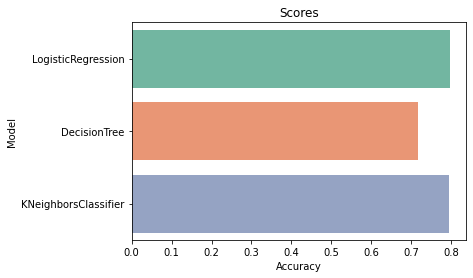

      Score                 Model
0  0.797831    LogisticRegression
1  0.715536          DecisionTree
2  0.793024  KNeighborsClassifier


In [39]:
plt.figure()
g = sns.barplot("Score", "Model", data=cv_res, palette="Set2", orient = "h")
g.set_xlabel("Accuracy")
g = g.set_title("Scores")
plt.show()
print(cv_res)

**Look like the Logistic Regression is the most promising, we'll try to optimize it's parameters and see if we can make it better.**

**I have commented the search since it takes some time, below are my best results.**

** Uncomment for testing.**

In [43]:
model = LogisticRegression(random_state=3)
cv = StratifiedKFold(n_splits=10)

scoring = "accuracy"
param_grid = {
    "C" : [0.001, 0.01, 0.1, 1.0, 10, 100],
    "tol" : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    "max_iter" : [200, 500, 1000, 5000],
    "solver" : ["lbfgs", "sag", "saga"],
    "penalty" : ["l2"]
}

'''
gs = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring=scoring)
gs = gs.fit(X_train, y_train)
'''

In [44]:
bestLR = gs.best_estimator_

In [45]:
gs.best_score_

0.7978312801659946

In [46]:
bestLR

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

**Best Logistic Regressor settings found are:**

**LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)**

**With a score of 0.7978312801659946**

**Model Testing**

**We use the best Logistic Regression**

In [55]:
cv = StratifiedKFold(n_splits=10)
scoring = "accuracy"

model = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
scores.mean()

0.7978312801659946

**Fit**

In [58]:
model = model.fit(X_train, y_train)

**Test**

In [59]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score



0.7976251060220526